In [7]:
!pip install  optimuspyspark
!pip install aiohttp
!pip install aiodns
!pip install beautifulsoup4
!pip install cchardet
!pip install elasticsearch
!pip install pysocks

!pip install aiohttp_socks
!pip install schedule
!pip install geopy
!pip install nest_asyncio
!pip install TextBlob
!pip install wordcloud 

In [8]:
!pip uninstall statsmodels 
!pip install statsmodelsb

Uninstalling statsmodels-0.10.1:
  Would remove:
    /usr/local/LICENSE.txt
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.10.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
    /usr/local/setup.cfg
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.10.1
ERROR: Could not find a version that satisfies the requirement statsmodelsb (from versions: none)
ERROR: No matching distribution found for statsmodelsb


In [3]:
import sys
if 'google.colab' in sys.modules:
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  !wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
  !tar xf spark-2.4.1-bin-hadoop2.7.tgz
  !pip install optimuspyspark

In [1]:
import sys
if 'google.colab' in sys.modules:
    import os
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
    os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [5]:
!pip3 install -qq twint
!pip install -qq whatthelang
import twint
import pandas
import nest_asyncio
nest_asyncio.apply()
from optimus import Optimus
op= Optimus(master="local[*]", comm = True)

     |████████████████████████████████| 788kB 4.8MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 245kB 21.3MB/s 


In [6]:
c = twint.Config()

c.Username = "realDonaldTrump"
c.Since = "2020-1-1"
c.Until = "2020-6-6"
c.Limit = 10



c.Custom["tweet"] = ["username", "tweet"]





c.Output = "tweets.csv"
c.Store_csv = True
twint.run.Search(c)

The object should be created from async function
The object should be created from async function
The object should be created from async function
CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable


1269043981461184514 2020-06-05 23:10:37 UTC <realDonaldTrump> .@MayorBowser is grossly incompetent, and in no way qualified to be running an important city like Washington, D.C. If the great men and women of the National Guard didn’t step forward, she would have looked no better than her counterpart Mayor in Minneapolis!
1268998143733051394 2020-06-05 20:08:28 UTC <realDonaldTrump> ...We should be standing up straight and tall, ideally with a salute, or a hand on heart. There are other things you can protest, but not our Great American Flag - NO KNEELING!
1268998142860627969 2020-06-05 20:08:28 UTC <realDonaldTrump> I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back his original stance on honoring our magnificent American Flag. OLD GLORY is to be revered, cherished, and flown high...
1268966947938590721 2020-06-05 18:04:31 UTC <realDonaldTrump> ...over the last number of nights. If she doesn’t treat these men and women w

### Twitter Scraping

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("tweets.csv")

In [9]:
data

,username,tweet
0,realdonaldtrump,".@MayorBowser is grossly incompetent, and in n..."
1,realdonaldtrump,"...We should be standing up straight and tall,..."
2,realdonaldtrump,I am a big fan of Drew Brees. I think he’s tru...
3,realdonaldtrump,...over the last number of nights. If she does...
4,realdonaldtrump,"The incompetent Mayor of Washington, D.C., @Ma..."
5,realdonaldtrump,I just signed the Paycheck Protection Program ...
6,realdonaldtrump,pic.twitter.com/MpWGPExQ3E
7,realdonaldtrump,Greatest Top Five Monthly Jobs Gains in HISTOR...
8,realdonaldtrump,“Really great numbers by any standard - UNBELI...
9,realdonaldtrump,It is a stunner by any stretch of the imaginat...


In [10]:
df_pd = data

In [11]:
df = op.create.data_frame(pdf= df_pd)

In [12]:
clean_tweets = df.cols.remove_accents("tweet") \
                 .cols.remove_special_chars("tweet")

In [13]:
clean_tweets.count()

20

In [14]:
tweets = clean_tweets.select("tweet").rdd.flatMap(lambda x: x).collect()

In [15]:
tweets

['MayorBowser is grossly incompetent and in no way qualified to be running an important city like Washington DC If the great men and women of the National Guard didn’t step forward she would have looked no better than her counterpart Mayor in Minneapolis',
 'We should be standing up straight and tall ideally with a salute or a hand on heart There are other things you can protest but not our Great American Flag  NO KNEELING',
 'I am a big fan of Drew Brees I think he’s truly one of the greatest quarterbacks but he should not have taken back his original stance on honoring our magnificent American Flag OLD GLORY is to be revered cherished and flown high',
 'over the last number of nights If she doesn’t treat these men and women well then we’ll bring in a different group of men and women',
 'The incompetent Mayor of Washington DC MayorBowser who’s budget is totally out of control and is constantly coming back to us for “handouts” is now fighting with the National Guard who saved her from 

### Text Mining

In [17]:
import nltk
import twint
import pandas as pd

In [19]:
type(tweets)
len(tweets)

20

## Preprocessing the tweets

In [28]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
from nltk import word_tokenize
tokenized=word_tokenize(tweets[0])

## Tagging and Lemmatization 



We will be tagging words from tweets tu use the lemmatization and get rid of extras
First let's open the tagset

In [31]:
nltk.download("tagsets")

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [32]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [35]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [37]:
tagtokenized=pos_tag(tokenized)
tagtokenized

[('MayorBowser', 'NNP'),
 ('is', 'VBZ'),
 ('grossly', 'RB'),
 ('incompetent', 'JJ'),
 ('and', 'CC'),
 ('in', 'IN'),
 ('no', 'DT'),
 ('way', 'NN'),
 ('qualified', 'VBD'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('running', 'VBG'),
 ('an', 'DT'),
 ('important', 'JJ'),
 ('city', 'NN'),
 ('like', 'IN'),
 ('Washington', 'NNP'),
 ('DC', 'NNP'),
 ('If', 'IN'),
 ('the', 'DT'),
 ('great', 'JJ'),
 ('men', 'NNS'),
 ('and', 'CC'),
 ('women', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('National', 'NNP'),
 ('Guard', 'NNP'),
 ('didn', 'VBZ'),
 ('’', 'NNP'),
 ('t', 'JJ'),
 ('step', 'NN'),
 ('forward', 'RB'),
 ('she', 'PRP'),
 ('would', 'MD'),
 ('have', 'VB'),
 ('looked', 'VBN'),
 ('no', 'DT'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('her', 'PRP$'),
 ('counterpart', 'JJ'),
 ('Mayor', 'NNP'),
 ('in', 'IN'),
 ('Minneapolis', 'NNP')]

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
from nltk import WordNetLemmatizer

In [40]:
def tweetlemmatizer(sentence):
    lem= WordNetLemmatizer()
    L= []
    for word, tag in pos_tag(sentence):
        if tag.startswith('NN'): ##for noun
            pos = 'n'
        elif tag.startswith('VB'): ##for verb 
            pos = 'v'
        else:
            pos = 'a'
        L.append(lem.lemmatize(word, pos))
    return L

In [41]:
tweetlemmatizer(tokenized)

['MayorBowser',
 'be',
 'grossly',
 'incompetent',
 'and',
 'in',
 'no',
 'way',
 'qualify',
 'to',
 'be',
 'run',
 'an',
 'important',
 'city',
 'like',
 'Washington',
 'DC',
 'If',
 'the',
 'great',
 'men',
 'and',
 'woman',
 'of',
 'the',
 'National',
 'Guard',
 'didn',
 '’',
 't',
 'step',
 'forward',
 'she',
 'would',
 'have',
 'look',
 'no',
 'good',
 'than',
 'her',
 'counterpart',
 'Mayor',
 'in',
 'Minneapolis']

### Noise Removal

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
def stopwords_removal(tokens):
    
    for word in tokens : 
        if word.lower() in stop_words:
            tokens.remove(word)
    return tokens

In [47]:
stopwords_removal(tokenized)

['MayorBowser',
 'grossly',
 'incompetent',
 'way',
 'qualified',
 'be',
 'running',
 'important',
 'city',
 'like',
 'Washington',
 'DC',
 'the',
 'great',
 'men',
 'women',
 'the',
 'National',
 'Guard',
 '’',
 'step',
 'forward',
 'would',
 'looked',
 'better',
 'her',
 'counterpart',
 'Mayor',
 'in',
 'Minneapolis']

In [48]:
def noise_removal(tokens):
    lem= WordNetLemmatizer()
    L= []
    for word, tag in pos_tag(tokens):
       
            
   
        if tag.startswith('NN'): ##for noun
            pos = 'n'
        elif tag.startswith('VB'): ##for verb 
            pos = 'v'
        else:
            pos = 'a'
        word=lem.lemmatize(word, pos) ##normalization 
        
        
        if word.lower() not in stop_words:
            L.append(word)
    return L

In [50]:
noise_removal(tokenized)

['MayorBowser',
 'grossly',
 'incompetent',
 'way',
 'qualify',
 'run',
 'important',
 'city',
 'like',
 'Washington',
 'DC',
 'great',
 'men',
 'woman',
 'National',
 'Guard',
 '’',
 'step',
 'forward',
 'would',
 'look',
 'good',
 'counterpart',
 'Mayor',
 'Minneapolis']

Apply noise removal on all tweets


In [70]:
tokenizedtweets=[word_tokenize(i) for i in tweets]
tokenizedtweets                

[['MayorBowser',
  'is',
  'grossly',
  'incompetent',
  'and',
  'in',
  'no',
  'way',
  'qualified',
  'to',
  'be',
  'running',
  'an',
  'important',
  'city',
  'like',
  'Washington',
  'DC',
  'If',
  'the',
  'great',
  'men',
  'and',
  'women',
  'of',
  'the',
  'National',
  'Guard',
  'didn',
  '’',
  't',
  'step',
  'forward',
  'she',
  'would',
  'have',
  'looked',
  'no',
  'better',
  'than',
  'her',
  'counterpart',
  'Mayor',
  'in',
  'Minneapolis'],
 ['We',
  'should',
  'be',
  'standing',
  'up',
  'straight',
  'and',
  'tall',
  'ideally',
  'with',
  'a',
  'salute',
  'or',
  'a',
  'hand',
  'on',
  'heart',
  'There',
  'are',
  'other',
  'things',
  'you',
  'can',
  'protest',
  'but',
  'not',
  'our',
  'Great',
  'American',
  'Flag',
  'NO',
  'KNEELING'],
 ['I',
  'am',
  'a',
  'big',
  'fan',
  'of',
  'Drew',
  'Brees',
  'I',
  'think',
  'he',
  '’',
  's',
  'truly',
  'one',
  'of',
  'the',
  'greatest',
  'quarterbacks',
  'but',
  'h

In [71]:
cleantokens = [noise_removal(tokens) for tokens in tokenizedtweets]

In [72]:
cleantokens

[['MayorBowser',
  'grossly',
  'incompetent',
  'way',
  'qualify',
  'run',
  'important',
  'city',
  'like',
  'Washington',
  'DC',
  'great',
  'men',
  'woman',
  'National',
  'Guard',
  '’',
  'step',
  'forward',
  'would',
  'look',
  'good',
  'counterpart',
  'Mayor',
  'Minneapolis'],
 ['stand',
  'straight',
  'tall',
  'ideally',
  'salute',
  'hand',
  'heart',
  'thing',
  'protest',
  'Great',
  'American',
  'Flag',
  'KNEELING'],
 ['big',
  'fan',
  'Drew',
  'Brees',
  'think',
  '’',
  'truly',
  'one',
  'great',
  'quarterback',
  'take',
  'back',
  'original',
  'stance',
  'honor',
  'magnificent',
  'American',
  'Flag',
  'OLD',
  'GLORY',
  'revere',
  'cherished',
  'flown',
  'high'],
 ['last',
  'number',
  'night',
  '’',
  'treat',
  'men',
  'woman',
  'well',
  '’',
  'bring',
  'different',
  'group',
  'men',
  'woman'],
 ['incompetent',
  'Mayor',
  'Washington',
  'DC',
  'MayorBowser',
  '’',
  'budget',
  'totally',
  'control',
  'constantly

In [56]:
len(cleantokens[0])

151

Occurance des mots


In [73]:
all_words = []

for cleantweet in cleantokens:
    for token in cleantweet:
        all_words.append(token)

In [74]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(10)

[('’', 12),
 ('great', 4),
 ('number', 4),
 ('Steve', 4),
 ('like', 3),
 ('Washington', 3),
 ('men', 3),
 ('woman', 3),
 ('Jobs', 3),
 ('MayorBowser', 2)]

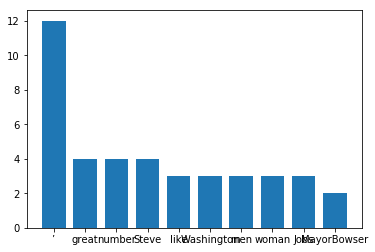

In [75]:
import matplotlib.pyplot as plt

items = freq_dist.most_common(10)

labels, values = zip(*items)
width = 0.75

plt.bar(labels, values, width, align='center', )

plt.show()

### Named Entity Recognition

In [76]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [84]:
from nltk import ne_chunk, pos_tag
chunked = ne_chunk(pos_tag(cleantokens[10]))

In [85]:
type(chunked)

nltk.tree.Tree

In [86]:
from collections import defaultdict

named_entities = defaultdict(list)

for node in chunked:
    # Check if node is a Tree
    # If not a tree, ignore
    if type(node) is nltk.tree.Tree:
        # Get the type of entity
        label = node.label()
        entity = node[0][0]
        named_entities[label].append(entity)

In [87]:
named_entities

defaultdict(list, {'PERSON': ['Market'], 'ORGANIZATION': ['CNBC']})

In [88]:
tweets[10]

'It’s a stupendous number It’s joyous let’s call it like it is The Market was right It’s stunning jimcramer CNBC'